# Wflow.jl in eWaterCycle

This notebook showcases the use of the Wflow.jl model in eWaterCycle.

In [1]:
from pathlib import Path
import numpy as np

The `wflow_sbm + kinematic wave` parameter set can be downloaded from https://deltares.github.io/Wflow.jl/dev/getting_started/download_example_models.html .

In [2]:
from ewatercycle.base.parameter_set import ParameterSet

parameters_moselle = ParameterSet(
    name="moselle",
    directory=Path("/data/wflow/sbm_moselle"),
    target_model="WflowJl",
    config="sbm_config.toml"   
)

In [3]:
import ewatercycle.models

model = ewatercycle.models.sources["WflowJl"](
    parameter_set=parameters_moselle,
)

/home/bart/miniconda3/envs/lock2/lib/python3.12/site-packages/esmvalcore/experimental/_warnings.py:13: UserWarning: 
  Thank you for trying out the new ESMValCore API.
  Note that this API is experimental and may be subject to change.
  More info: https://github.com/ESMValGroup/ESMValCore/issues/498


In [4]:
cfg_file,_ = model.setup()

Don't immediately run the next cell: the model needs time to set up. After a few seconds the server will be ready.

In [5]:
model.initialize(cfg_file)

After initialization we can interact with the model. For example requesting the river discarge:

/home/bart/git2/ewatercycle-wflowjl/src/ewatercycle_wflowjl/model.py:64: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'loc' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.


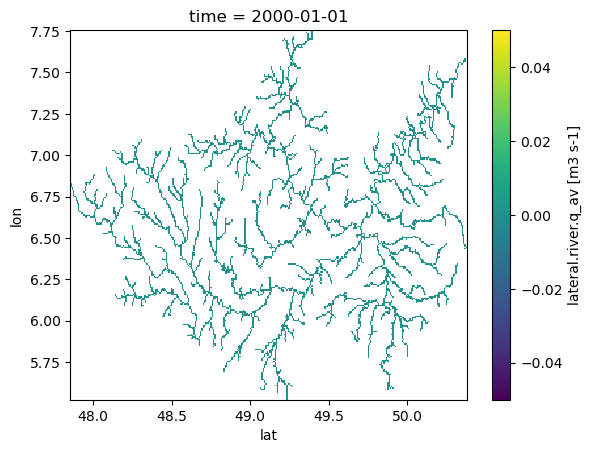

In [6]:
da = model.get_value_as_xarray("lateral.river.q_av")
da.unstack().isel(time=0).plot()

We can also request this discharge at two lat/lon locations along the river

Text(0, 0.5, 'discharge [m3/s]')

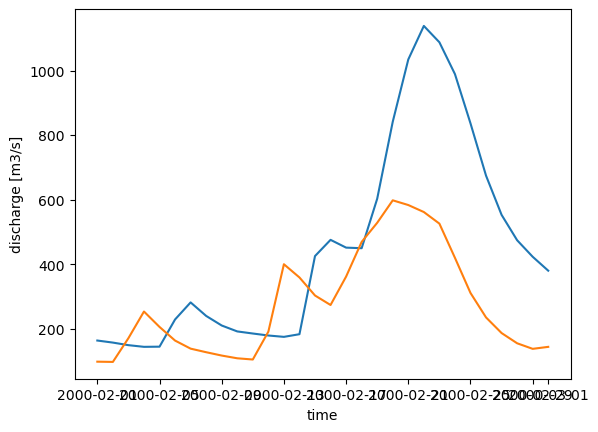

In [19]:
#      Location A, Location B.
lats = [50.00,     49.5]
lons = [ 7.12,      6.37]

ntimesteps = int(model._bmi.get_end_time() / model._bmi.get_time_step()) - 1
q_locs = np.zeros((ntimesteps, 2,))
dtimes = []
for tstep in range(q_locs.shape[0]):
    model.update()
    q_locs[tstep] = model.get_value_at_coords("lateral.river.q_av", lats, lons)
    dtimes.append(model.time_as_datetime)

import matplotlib.pyplot as plt
plt.plot(dtimes, q_locs[:, 0])
plt.plot(dtimes, q_locs[:, 1])
plt.xlabel("time")
plt.ylabel("discharge [m3/s]")

/home/bart/git2/ewatercycle-wflowjl/src/ewatercycle_wflowjl/model.py:64: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'loc' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.


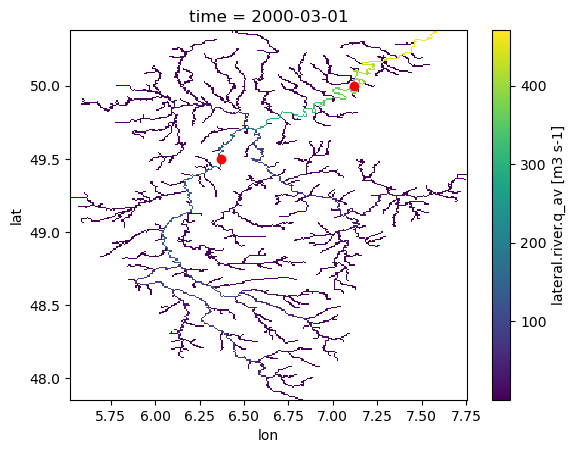

In [20]:
da = model.get_value_as_xarray("lateral.river.q_av")

da.unstack().isel(time=0).plot(x="lon")
plt.scatter(lons, lats, marker="o", c="red")

In [ ]:
model.finalize()